In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [ ]:
ratings_list = [i.strip().split(",") for i in open('Ratings.csv','rb').readlines()]
users_list = [i.strip().split(",") for i in open('Users.csv','rb').readlines()]
books_list = [i.strip().split(",") for i in open('Books.csv','rb'),encoding='latin-1')]

ratings_df =pd.DataFrame(ratings_list, columns=['UserID','ISBN','BookRating'], dtype= int)
books_pdf=pd.DataFrame(books_list, columns =['ISBN', 'BookTitle', 'BookAuthor', 'YearOfPublication', 'Publisher', 'ImageURLS', 'ImageURLM', 'ImageURLL'])
user_df=pd.DataFrame(users_list, columns=['UserID','Location','Age'])


In [ ]:
books_df['ISBN']=books_df['ISBN'].apply(pd.to_numeric)
user_df['UserID']=user_df['UserID'].apply(pd.to_numeric)
user_df['Age']=user_df['Age'].apply(pd.to_numeric)

In [ ]:
print('User table description: ')
print(user_df.head())
print(user_df.describe())

In [4]:
ratings.head()

,UserID,ISBN,BookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [8]:
books.columns

Index(['ISBN', 'BookTitle', 'BookAuthor', 'YearOfPublication', 'Publisher',
       'ImageURLS', 'ImageURLM', 'ImageURLL'],
      dtype='object')

## Books data- Pre Processing


In [11]:
books.shape
users.shape
ratings.shape

(1149780, 3)

In [ ]:
books.descri

In [4]:
print(books.shape)
print(list(books.columns))

(271360, 8)
['ISBN', 'BookTitle', 'BookAuthor', 'YearOfPublication', 'Publisher', 'ImageURLS', 'ImageURLM', 'ImageURLL']


In [5]:
books.head()

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher,ImageURLS,ImageURLM,ImageURLL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
books.dtypes

ISBN                 object
BookTitle            object
BookAuthor           object
YearOfPublication    object
Publisher            object
ImageURLS            object
ImageURLM            object
ImageURLL            object
dtype: object

In [7]:
pd.set_option('display.max_colwidth', -1)

In [8]:
books.YearOfPublication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [9]:
books.loc[books.YearOfPublication == "DK Publishing Inc", :]

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher,ImageURLS,ImageURLM,ImageURLL
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg,NaN


In [10]:
books.loc[books.ISBN =='0789466953','YearOfPublication'] =2000
books.loc[books.ISBN =='0789466953','BookAuthor'] ='James Buckley'
books.loc[books.ISBN =='0789466953','Publisher'] ='DK Publishing Inc'
# books.loc[books.ISBN =='0789466953','BookTitle'] ='DK Readers: Creating the X-Men, How Comic Books Come to Life'

In [11]:
books.loc[books.ISBN =='078946697X','YearOfPublication'] =2000
books.loc[books.ISBN =='078946697X','BookAuthor'] ='JMichael Teitelbaum'
books.loc[books.ISBN =='078946697X','Publisher'] ='DK Publishing Inc'

In [12]:
books.loc[books.YearOfPublication == 'Gallimard', :]

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher,ImageURLS,ImageURLM,ImageURLL
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg,NaN


In [13]:
books.loc[books.ISBN =='2070426769','YearOfPublication'] =2003
books.loc[books.ISBN =='2070426769','BookAuthor'] ='Jean-Marie Gustave Le ClÃ?Â©zio'
books.loc[books.ISBN =='2070426769','Publisher'] ='Gallimard'
books.loc[books.ISBN == '2070426769' ,'BookTitle'] ='Peuple du ciel, suivi de Les Berges'

In [14]:
books.YearOfPublication = pd.to_numeric(books.YearOfPublication, errors='coerce')

In [15]:
print (sorted(books['YearOfPublication'].unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [16]:
books.loc[(books.YearOfPublication >2006) |(books.YearOfPublication ==0), 'YearOfPublication'] =np.NAN
books.YearOfPublication.fillna(round(books.YearOfPublication.mean()), inplace=True)

In [17]:
books.YearOfPublication =books.YearOfPublication.astype(np.int32)

In [18]:
books.loc[books.Publisher.isnull(),:]

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher,ImageURLS,ImageURLM,ImageURLL
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.LZZZZZZZ.jpg
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.LZZZZZZZ.jpg


In [19]:
books.loc[(books.ISBN =='193169656X'),'Publisher']='other'
books.loc[(books.ISBN =='1931696993'),'Publisher']='other'

## Users Data- pre Processing

In [20]:
print(users.shape)
print(list(users.columns))

(278858, 3)
['UserID', 'Location', 'Age']


In [21]:
users.head()

,UserID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [22]:
users.dtypes

UserID      int64  
Location    object 
Age         float64
dtype: object

In [23]:
users.UserID.values

array([     1,      2,      3, ..., 278856, 278857, 278858], dtype=int64)

In [24]:
print(sorted(users.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [25]:
users.loc[(users.Age > 90) | (users.Age < 5), 'Age'] = np.nan
users.Age = users.Age.fillna(users.Age.mean())
users.Age = users.Age.astype(np.int32)

In [26]:
print(sorted(users.Age.unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


In [27]:
print(ratings.shape)
print(list(ratings.columns))

(1149780, 3)
['UserID', 'ISBN', 'BookRating']


## Ratings data- Pre Processing

In [28]:
print(ratings.shape)
print(list(ratings.columns))

(1149780, 3)
['UserID', 'ISBN', 'BookRating']


In [29]:
ratings.head()

,UserID,ISBN,BookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


## Rating Distribution

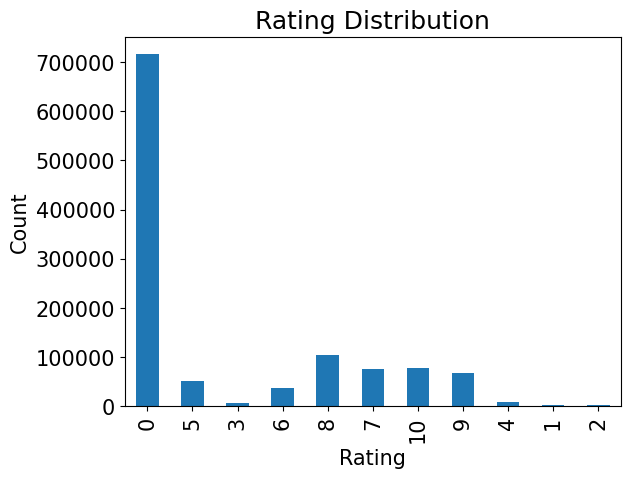

In [30]:
plt.rc("font", size = 15)
ratings.BookRating.value_counts(sort=False).plot(kind ='bar')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.plot()
plt.savefig("Ratings Distribution.jpg", bbox_inches = "tight", dpi=100)

In [31]:
n_users =users.shape[0]
n_books = books.shape[0]
print(n_users * n_books)

75670906880


In [32]:
new_ratings = ratings[ratings.ISBN.isin(books.ISBN)]
new_ratings = new_ratings[new_ratings.UserID.isin(users.UserID)]

In [33]:
print(ratings.shape)
print(new_ratings.shape)

(1149780, 3)
(1031136, 3)


In [34]:
new_ratings.head()

,UserID,ISBN,BookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [35]:
sparsity =1.0 - len(new_ratings)/float(n_users*n_books)
print('The sparsity level of Book Crossing Dataset is '+ str(sparsity*100)+'%')

The sparsity level of Book Crossing Dataset is 99.99863734155898%


In [36]:
ratings.BookRating.unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [37]:
ratings_explicit = new_ratings[new_ratings.BookRating != 0]
ratings_implicit = new_ratings[new_ratings.BookRating == 0]

In [38]:
users_exp_ratings = users[users.UserID.isin(ratings_explicit.UserID)]
user_imp_ratings = users[users.UserID.isin(ratings_implicit.UserID)]

In [39]:
print(new_ratings.shape)
print(ratings_explicit.shape)
print(ratings_implicit.shape)

(1031136, 3)
(383842, 3)
(647294, 3)


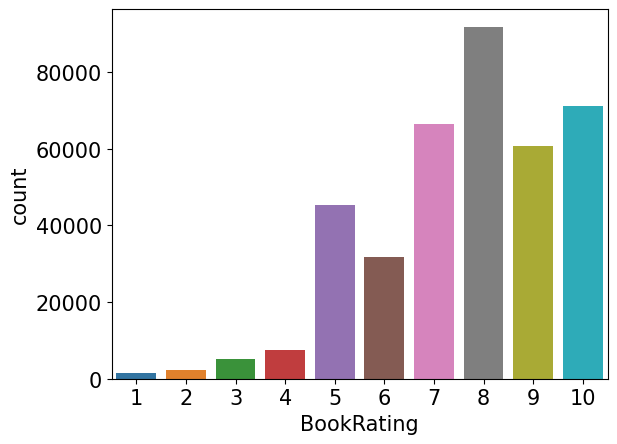

In [40]:
sns.countplot(data = ratings_explicit , x='BookRating')
plt.show()

## 1.Popularity Bases Recommendation System

In [41]:
ratings_count = pd.DataFrame(ratings_explicit.groupby(['ISBN'])['BookRating'].sum())
top10 = ratings_count.sort_values('BookRating', ascending =False).head(10)
print('Following books are recommended')
recoms = top10.merge(books, left_index = True, right_on ='ISBN')
df_resultats = pd.DataFrame(recoms, columns=['BookRating','ISBN','BookTitle','BookAuthor','YearOfPublication','Publisher','ImageURLS','ImageURLM','ImageURLL'])
df_resultats



Following books are recommended


,BookRating,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher,ImageURLS,ImageURLM,ImageURLL
408,5787,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0316666343.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0316666343.01.LZZZZZZZ.jpg
748,4108,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0385504209.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0385504209.01.LZZZZZZZ.jpg
522,3134,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0312195516.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0312195516.01.LZZZZZZZ.jpg
2143,2798,059035342X,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),J. K. Rowling,1999,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/059035342X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/059035342X.01.LZZZZZZZ.jpg
356,2595,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books,http://images.amazon.com/images/P/0142001740.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0142001740.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0142001740.01.LZZZZZZZ.jpg
26,2551,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0971880107.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0971880107.01.LZZZZZZZ.jpg
1105,2524,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060928336.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060928336.01.LZZZZZZZ.jpg
706,2402,0446672211,Where the Heart Is (Oprah's Book Club (Paperback)),Billie Letts,1998,Warner Books,http://images.amazon.com/images/P/0446672211.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0446672211.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0446672211.01.LZZZZZZZ.jpg
231,2219,0452282152,Girl with a Pearl Earring,Tracy Chevalier,2001,Plume Books,http://images.amazon.com/images/P/0452282152.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0452282152.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0452282152.01.LZZZZZZZ.jpg
118,2179,0671027360,Angels &amp; Demons,Dan Brown,2001,Pocket Star,http://images.amazon.com/images/P/0671027360.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0671027360.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0671027360.01.LZZZZZZZ.jpg


In [43]:
import requests
ratings_count = pd.DataFrame(ratings_explicit.groupby(['ISBN'])['BookRating'].sum())
top10 = ratings_count.sort_values('BookRating', ascending =False).head(10)
print('Following books are recommended')
recoms = top10.merge(books, left_index = True, right_on ='ISBN')
df_resultats = pd.DataFrame(recoms, columns=['BookRating','ISBN','BookTitle','BookAuthor','YearOfPublication','Publisher','ImageURLS','ImageURLM','ImageURLL'])
df_resultats

recommandations_json = df_resultats.to_json(orient='records')
flask_api_url = "http://127.0.0.1:5000/receive_recommendations"
response = requests.post(flask_api_url, json=recommandations_json)
print(response.text)


Following books are recommended
{
  "message": "Recommandations re\u00e7ues avec succ\u00e8s",
  "recommandations": "[{\"BookRating\":5787,\"ISBN\":\"0316666343\",\"BookTitle\":\"The Lovely Bones: A Novel\",\"BookAuthor\":\"Alice Sebold\",\"YearOfPublication\":2002,\"Publisher\":\"Little, Brown\",\"ImageURLS\":\"http:\\/\\/images.amazon.com\\/images\\/P\\/0316666343.01.THUMBZZZ.jpg\",\"ImageURLM\":\"http:\\/\\/images.amazon.com\\/images\\/P\\/0316666343.01.MZZZZZZZ.jpg\",\"ImageURLL\":\"http:\\/\\/images.amazon.com\\/images\\/P\\/0316666343.01.LZZZZZZZ.jpg\"},{\"BookRating\":4108,\"ISBN\":\"0385504209\",\"BookTitle\":\"The Da Vinci Code\",\"BookAuthor\":\"Dan Brown\",\"YearOfPublication\":2003,\"Publisher\":\"Doubleday\",\"ImageURLS\":\"http:\\/\\/images.amazon.com\\/images\\/P\\/0385504209.01.THUMBZZZ.jpg\",\"ImageURLM\":\"http:\\/\\/images.amazon.com\\/images\\/P\\/0385504209.01.MZZZZZZZ.jpg\",\"ImageURLL\":\"http:\\/\\/images.amazon.com\\/images\\/P\\/0385504209.01.LZZZZZZZ.jpg\"},{

## 2.Collaborative Filtering based Recommendation System

In [82]:
counts1= ratings_explicit['UserID'].value_counts()
ratings_explicit = ratings_explicit[ratings_explicit['UserID'].isin(counts1[counts1 >= 100].index)]
counts = ratings_explicit['BookRating'].value_counts()
ratings_explicit = ratings_explicit[ratings_explicit['BookRating'].isin(counts[counts >= 100].index)]

In [83]:
ratings_matrix = ratings_explicit.pivot(index='UserID',columns='ISBN', values='BookRating')
UserID= ratings_matrix.index
ISBN=ratings_matrix.columns
print(ratings_matrix.shape)
ratings_matrix.head()

(449, 66574)


ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
UserID,,,,,,,,,,,,,,,,,,,,,
2033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
n_users = ratings_matrix.shape[0]
n_books = ratings_matrix.shape[1]
print(n_users, n_books)

449 66574


In [85]:
ratings_matrix.fillna(0,inplace =True)
ratings_matrix =ratings_matrix.astype(np.int32)

In [86]:
ratings_matrix.head(5)

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
UserID,,,,,,,,,,,,,,,,,,,,,
2033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4385,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
sparsity=1.0-len(ratings_explicit)/float(users_exp_ratings.shape[0]*n_books)

In [89]:
print('The sparsity level of Book Crossing dataset is ' + str(sparsity*100)+ ' %')

The sparsity level of Book Crossing dataset is99.99772184106935 %


In [121]:
global metric,k
k=10
metric='cosine'

In [122]:
#find k similar items given the iser_id and ratings matrix
def findksimilarusers(User_ID, ratings, metric=metric, k=k):
    similarities = []
    indices =[]
    model_knn = NearestNeighbors( metric= metric, algorithm='brute')
    model_knn.fit(ratings)
    loc= ratings.index.get_loc(User_ID)
    distances, indices = model_knn.kneighbors(ratings.iloc[loc, :].values.reshape(1, -1), n_neighbors = k+1)
    similarities= 1-distances.flatten()
    return similarities, indices
    

In [125]:
def predict_userbased(User_ID, item_id, ratings, metric = metric, k=k):
    prediction = 0
    user_loc = ratings.index.get_loc(User_ID)
    item_loc= ratings.columns.get_loc(item_id)
    similarities, indices = findksimilarusers(User_ID, ratings, metric, k)
    mean_rating = ratings.iloc[user_loc,:].mean()
    sum_wt = np.sum(similarities)-1
    product=1
    wtd_sum = 0
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i] == user_loc:
            continue
        else:
            ratings_diff = ratings.iloc[indices.flatten()[i],item_loc]-np.mean(ratings.iloc[indices.flatten()[i],:])
            wtd_sum = wtd_sum+product
            
    if prediction <= 0:
        prediction = 1
    elif prediction >10:
        prediction =10
        
    prediction = int(round(mean_rating +(wtd_sum/sum_wt)))
    print('\nPredicted rating for user {0} -> item {1}: {2}'.format(User_ID,item_id,prediction))
    
    return prediction
            

In [126]:
predict_userbased(11676,'0001056107', ratings_matrix);


Predicted rating for user 11676 -> item 0001056107: 16


## Item Based Recommendation Systems


In [148]:
#This function finds k similar items given the item id and ratings matrix 
def findksimilaritems(item_id, ratings, metric=metric, k=k):
    similarities=[]
    indices=[]
    ratings=ratings.T
    loc = ratings.index.get_loc(item_id)
    model_knn = NearestNeighbors(metric = metric, algorithm = 'brute')
    model_knn. fit (ratings)
    
    distances, indices = model_knn.kneighbors(ratings.iloc[loc, :].values.reshape(1, -1), n_neighbors = k+1)
    similarities = 1-distances. flatten()
    return similarities, indices


In [149]:
def predict_itembased(user_id, item_id, ratings, metric = metric, k=k):
    prediction= wtd_sum =0
    user_loc = ratings.index.get_loc(user_id)
    item_loc = ratings.columns.get_loc(item_id)
    similarities, indices=findksimilaritems(item_id, ratings) #similar users based on correlation coefficients
    sum_wt = np.sum(similarities)-1
    product=1
    for i in range(0, len(indices. flatten())):
        if indices.flatten()[i] == item_loc:
            continue;
        else:
            product = ratings. iloc[user_loc, indices. flatten()[i]] * (similarities [i])
            wtd_sum = wtd_sum + product
    prediction = int(round(wtd_sum/sum_wt))
    #in case of very sparse datasets, using correlation metric for collaborative based approach may give negative ratings #which are handled here as below //code has been validated without the code snippet below, below snippet is to avoid negativ #predictions which might arise in case of very sparse datasets when using correlation metric 
    if prediction <= 0:
        prediction = 1
    elif prediction >10:
        prediction = 10
    print ('\nPredicted rating for user {0}-› item (1): {2}'.format(user_id, item_id,prediction))
    return prediction


In [150]:
prediction = predict_itembased(11676, '0001056107', ratings_matrix)


Predicted rating for user 11676-› item (1): 1


In [152]:
@contextmanager
def suppose_sdout():
    with open(os.devnull,"w") as devnull:
        old_stdout =syc.stdout
        sys.stout= devnull
        try:
            yield
        finally:
            sys.stdout =old_stdout